In [54]:
import pandas as pd
file_path = 'SDI_Pollution_Data_Delhi_Hourly.csv'
data= pd.read_csv(file_path)
df_info= data.info()
df_head= data.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   1860 non-null   object 
 1   From Date  1860 non-null   object 
 2   To Date    1860 non-null   object 
 3   PM2.5      1855 non-null   float64
 4   PM10       1852 non-null   float64
 5   NO         1860 non-null   float64
 6   NO2        1860 non-null   float64
 7   NOx        1859 non-null   float64
 8   NH3        1859 non-null   float64
 9   SO2        1859 non-null   float64
 10  CO         1857 non-null   float64
 11  Ozone      1837 non-null   float64
dtypes: float64(9), object(3)
memory usage: 174.5+ KB


(None,
      Location         From Date           To Date   PM2.5    PM10     NO  \
 0  Location_1  01-01-2025 00:00  01-01-2025 01:00  199.75  295.25  30.05   
 1  Location_1  01-01-2025 01:00  01-01-2025 02:00  192.75  298.75  36.27   
 2  Location_1  01-01-2025 02:00  01-01-2025 03:00  163.75  270.25  28.22   
 3  Location_1  01-01-2025 03:00  01-01-2025 04:00  115.00  207.75  18.52   
 4  Location_1  01-01-2025 04:00  01-01-2025 05:00  122.50  191.75  16.75   
 
       NO2     NOx    NH3    SO2    CO  Ozone  
 0  114.40   85.25  51.42  13.95  2.67  12.25  
 1  150.05  109.33  52.92  13.35  3.06  12.15  
 2  107.30   80.00  44.22  12.90  2.00  11.93  
 3   57.17   45.50  29.58  12.53  1.29  11.70  
 4   42.20   36.02  27.53   5.15  1.08  11.93  )

In [56]:
# Mapping of old names to new names
location_mapping = {
    "Location_1": "ITO",
    "Location_2": "SIRIFORT",
    "Location_3": "JN STADIUM",
    "Location_4": "DTU",
    "Location_5": "DWARKA"
}

# Replace location names
data["Location"] = data["Location"].replace(location_mapping)

# Display the updated DataFrame
print(data)


     Location         From Date           To Date   PM2.5    PM10     NO  \
0         ITO  01-01-2025 00:00  01-01-2025 01:00  199.75  295.25  30.05   
1         ITO  01-01-2025 01:00  01-01-2025 02:00  192.75  298.75  36.27   
2         ITO  01-01-2025 02:00  01-01-2025 03:00  163.75  270.25  28.22   
3         ITO  01-01-2025 03:00  01-01-2025 04:00  115.00  207.75  18.52   
4         ITO  01-01-2025 04:00  01-01-2025 05:00  122.50  191.75  16.75   
...       ...               ...               ...     ...     ...    ...   
1855   DWARKA  16-01-2025 07:00  16-01-2025 08:00   79.27  131.45  10.68   
1856   DWARKA  16-01-2025 08:00  16-01-2025 09:00   73.65  111.25  11.71   
1857   DWARKA  16-01-2025 09:00  16-01-2025 10:00   58.40   89.70  10.51   
1858   DWARKA  16-01-2025 10:00  16-01-2025 11:00   93.85  110.00  12.43   
1859   DWARKA  16-01-2025 11:00  16-01-2025 12:00   77.70  112.80  11.93   

         NO2     NOx    NH3    SO2    CO  Ozone  
0     114.40   85.25  51.42  13.95  2

In [58]:
# Parse date and time columns
data["From Date"] = pd.to_datetime(data["From Date"], format="%d-%m-%Y %H:%M")
data["To Date"] = pd.to_datetime(data["To Date"], format="%d-%m-%Y %H:%M")

In [60]:
# One-hot encoding for Location (if multiple locations exist)
# data = pd.get_dummies(data, columns=["Location"], drop_first=False)

In [62]:
data

,Location,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,ITO,2025-01-01 00:00:00,2025-01-01 01:00:00,199.75,295.25,30.05,114.40,85.25,51.42,13.95,2.67,12.25
1,ITO,2025-01-01 01:00:00,2025-01-01 02:00:00,192.75,298.75,36.27,150.05,109.33,52.92,13.35,3.06,12.15
2,ITO,2025-01-01 02:00:00,2025-01-01 03:00:00,163.75,270.25,28.22,107.30,80.00,44.22,12.90,2.00,11.93
3,ITO,2025-01-01 03:00:00,2025-01-01 04:00:00,115.00,207.75,18.52,57.17,45.50,29.58,12.53,1.29,11.70
4,ITO,2025-01-01 04:00:00,2025-01-01 05:00:00,122.50,191.75,16.75,42.20,36.02,27.53,5.15,1.08,11.93
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,DWARKA,2025-01-16 07:00:00,2025-01-16 08:00:00,79.27,131.45,10.68,23.59,21.23,67.62,12.92,0.58,8.78
1856,DWARKA,2025-01-16 08:00:00,2025-01-16 09:00:00,73.65,111.25,11.71,30.94,25.98,70.31,12.11,0.50,7.62
1857,DWARKA,2025-01-16 09:00:00,2025-01-16 10:00:00,58.40,89.70,10.51,31.88,25.68,71.93,7.63,0.12,8.78
1858,DWARKA,2025-01-16 10:00:00,2025-01-16 11:00:00,93.85,110.00,12.43,41.29,32.06,70.53,5.40,0.12,7.80


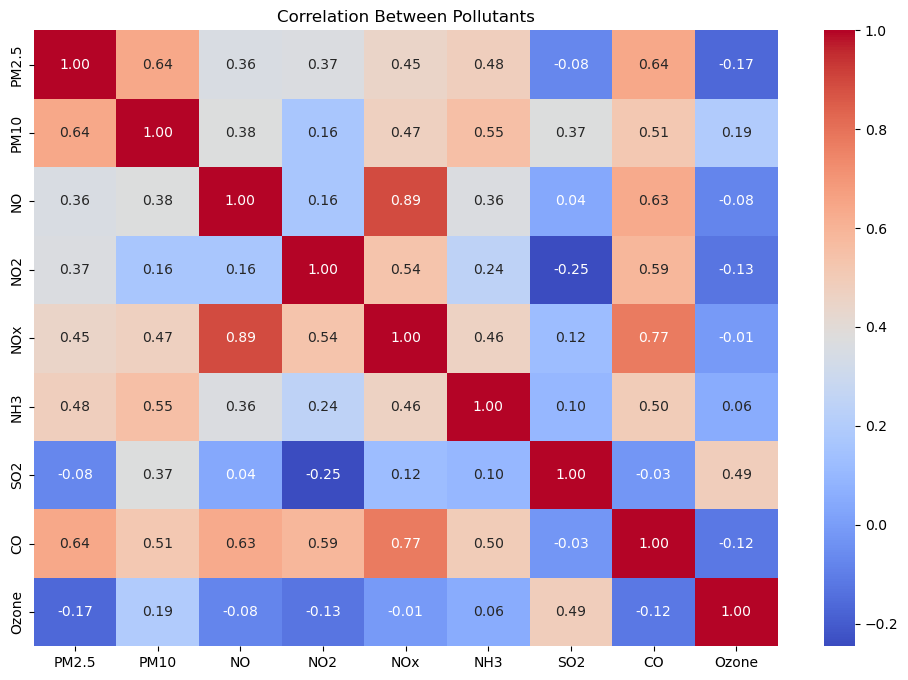

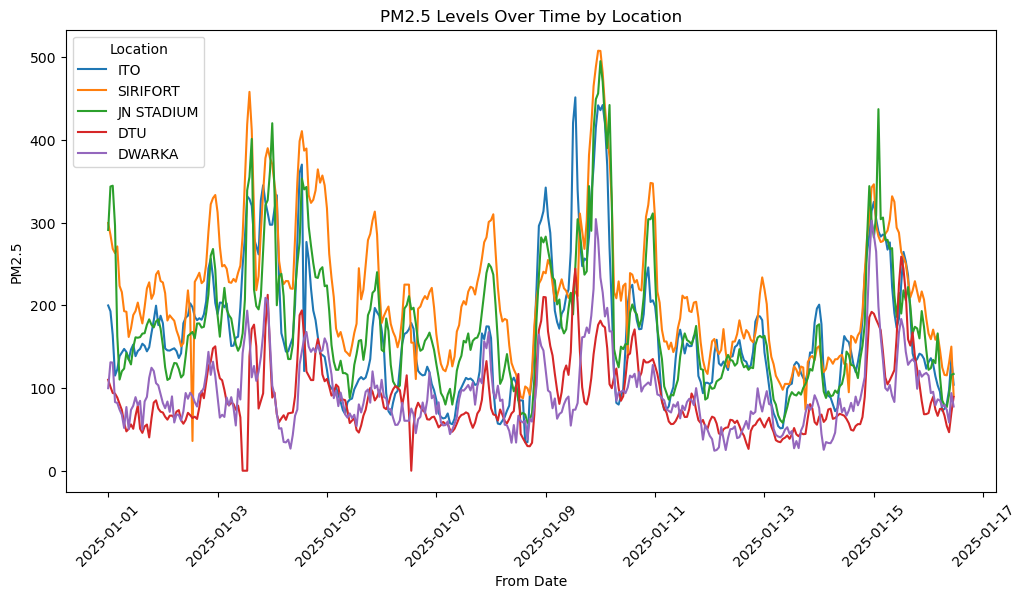

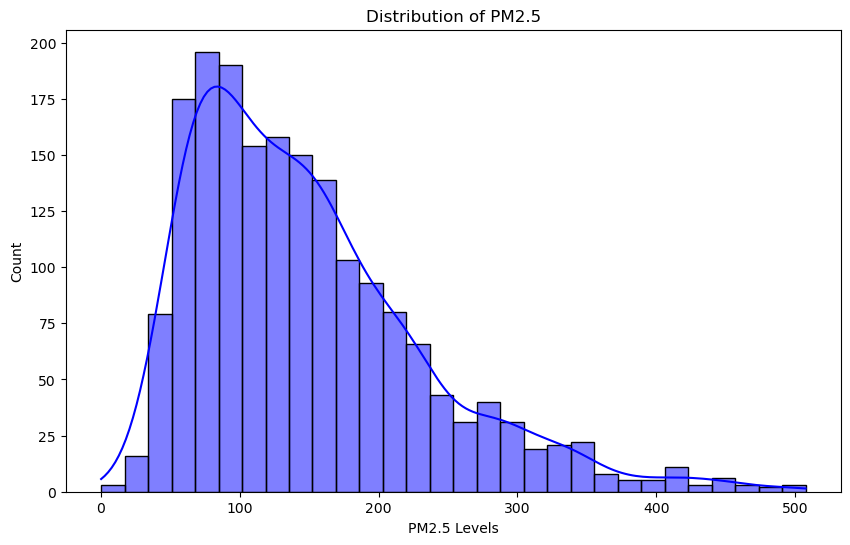

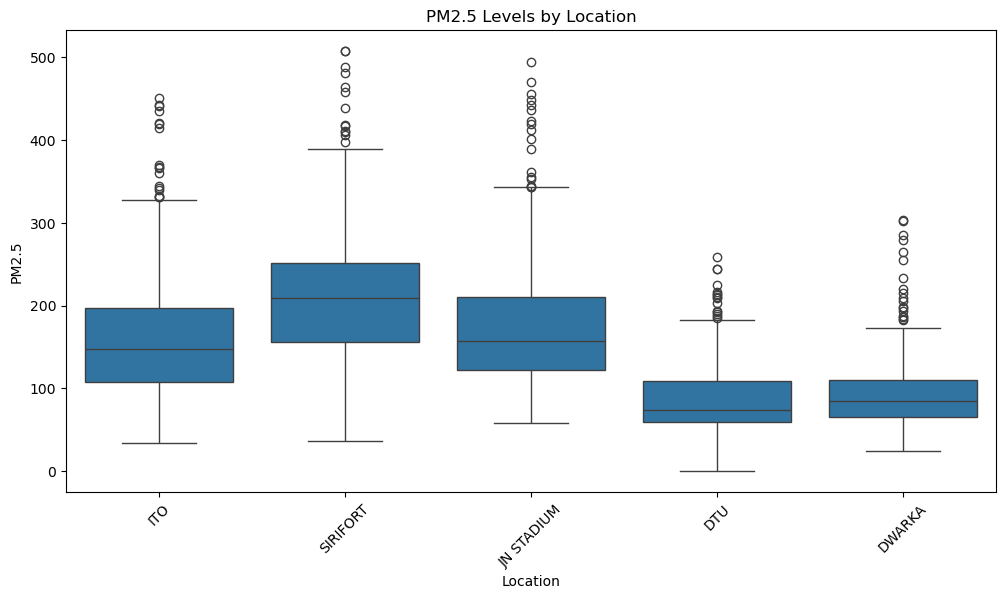

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns for correlation matrix
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pollutants')
plt.show()

# Time series trend of PM2.5
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='From Date', y='PM2.5', hue='Location')
plt.title('PM2.5 Levels Over Time by Location')
plt.xticks(rotation=45)
plt.show()

# Distribution of PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(data['PM2.5'], bins=30, kde=True, color='blue')
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 Levels')
plt.show()

# Boxplot for pollutants by location
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Location', y='PM2.5')
plt.title('PM2.5 Levels by Location')
plt.xticks(rotation=45)
plt.show()


In [66]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Example: Reshape the location columns
# location_columns = ['Location_DTU', 'Location_DWARKA', 'Location_ITO', 'Location_JN STADIUM', 'Location_SIRIFORT']
# data = data.melt(
#     id_vars=['From Date', 'To Date', 'PM2.5'], 
#     value_vars=location_columns, 
#     var_name='Location', 
#     value_name='Is_Location'
# )

# # Filter only rows where Is_Location is True
# data = data[data['Is_Location']].drop(columns=['Is_Location'])

# # Simplify the location names (optional)
# data['Location'] = data['Location'].str.replace('Location_', '')

# # Plot the PM2.5 levels over time by location
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=data, x='From Date', y='PM2.5', hue='Location')
# plt.title('PM2.5 Levels Over Time by Location')
# plt.xticks(rotation=45)
# plt.show()

# # Boxplot for pollutants by location
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=data, x='Location', y='PM2.5')
# plt.title('PM2.5 Levels by Location')
# plt.xticks(rotation=45)
# plt.show()

# # Filter numeric columns for correlation matrix
# numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
# correlation_matrix = data[numeric_cols].corr()

# # Correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Between Pollutants')
# plt.show()

In [68]:
data

,Location,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,ITO,2025-01-01 00:00:00,2025-01-01 01:00:00,199.75,295.25,30.05,114.40,85.25,51.42,13.95,2.67,12.25
1,ITO,2025-01-01 01:00:00,2025-01-01 02:00:00,192.75,298.75,36.27,150.05,109.33,52.92,13.35,3.06,12.15
2,ITO,2025-01-01 02:00:00,2025-01-01 03:00:00,163.75,270.25,28.22,107.30,80.00,44.22,12.90,2.00,11.93
3,ITO,2025-01-01 03:00:00,2025-01-01 04:00:00,115.00,207.75,18.52,57.17,45.50,29.58,12.53,1.29,11.70
4,ITO,2025-01-01 04:00:00,2025-01-01 05:00:00,122.50,191.75,16.75,42.20,36.02,27.53,5.15,1.08,11.93
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,DWARKA,2025-01-16 07:00:00,2025-01-16 08:00:00,79.27,131.45,10.68,23.59,21.23,67.62,12.92,0.58,8.78
1856,DWARKA,2025-01-16 08:00:00,2025-01-16 09:00:00,73.65,111.25,11.71,30.94,25.98,70.31,12.11,0.50,7.62
1857,DWARKA,2025-01-16 09:00:00,2025-01-16 10:00:00,58.40,89.70,10.51,31.88,25.68,71.93,7.63,0.12,8.78
1858,DWARKA,2025-01-16 10:00:00,2025-01-16 11:00:00,93.85,110.00,12.43,41.29,32.06,70.53,5.40,0.12,7.80


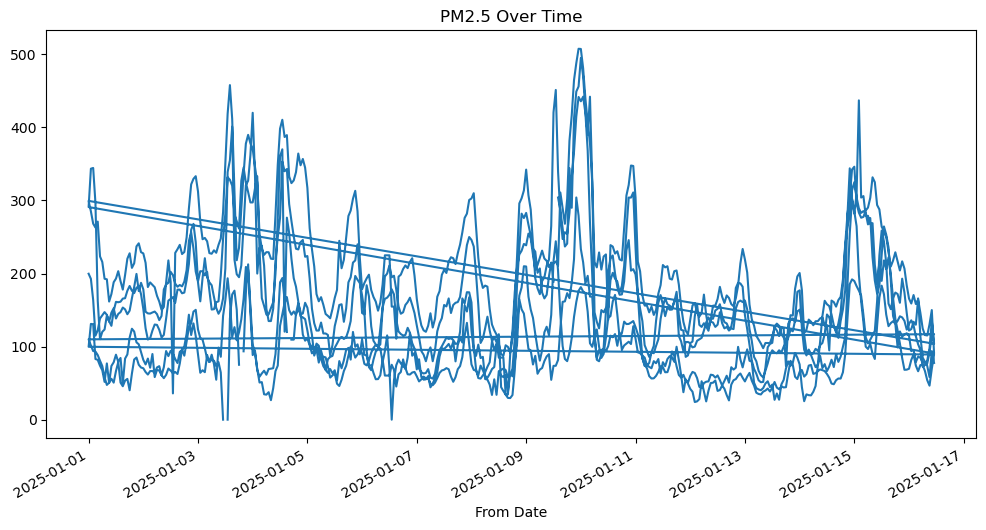

In [70]:
# Visualization: Check trends and seasonality
plt.figure(figsize=(12, 6))
data.set_index("From Date")["PM2.5"].plot()
plt.title("PM2.5 Over Time")
plt.show()

In [72]:
cleaned_data = data.set_index("From Date")
cleaned_data.to_csv("cleaned_pol_data.csv")